
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install autocorrelation_plot

ERROR: Could not find a version that satisfies the requirement autocorrelation_plot (from versions: none)
ERROR: No matching distribution found for autocorrelation_plot


In [3]:
df=pd.read_csv('C:/Users/Syed Ali Haider/Desktop/sample.csv')

In [4]:
df.head()

,Date,Quantity
0,1/1/2022,2469
1,1/2/2022,2082
2,1/3/2022,3047
3,1/4/2022,3121
4,1/5/2022,2851


In [5]:
df.tail()

,Date,Quantity
237,8/26/2022,3872
238,8/27/2022,3557
239,8/28/2022,3192
240,8/29/2022,3912
241,8/30/2022,4020


In [184]:
## Cleaning up the data
df.columns=["Date","Quantity"]
df.head()

,Date,Quantity
0,1/1/2022,3298
1,1/2/2022,25485
2,1/9/2022,27653
3,1/16/2022,29803
4,1/23/2022,60348


In [17]:
## Drop last 2 rows
df.drop(8,axis=0,inplace=True)

In [6]:
df.tail()

,Date,Quantity
237,8/26/2022,3872
238,8/27/2022,3557
239,8/28/2022,3192
240,8/29/2022,3912
241,8/30/2022,4020


In [142]:
df.drop(105,axis=0,inplace=True)

KeyError: '[105] not found in axis'

In [143]:
df.tail()

,Date,Quantity
37,2/7/2022,25885
38,2/8/2022,19380
39,2/9/2022,30729
40,2/10/2022,34256
41,2/11/2022,13635


In [186]:
# Convert Month into Datetime
df['Date']=pd.to_datetime(df['Date'])

In [7]:
df.head()

,Date,Quantity
0,1/1/2022,2469
1,1/2/2022,2082
2,1/3/2022,3047
3,1/4/2022,3121
4,1/5/2022,2851


In [10]:
df.set_index('Date',inplace=True)

In [11]:
df.head()

,Quantity
Date,
1/1/2022,2469
1/2/2022,2082
1/3/2022,3047
1/4/2022,3121
1/5/2022,2851


In [12]:
df.describe()

,Quantity
count,242.000000
mean,3716.272727
std,1358.036131
min,92.000000
25%,3001.750000
50%,3804.500000
75%,4552.250000
max,10730.000000


## Step 2: Visualize the Data

<AxesSubplot:xlabel='Date'>

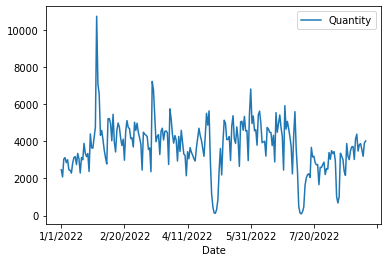

In [13]:
df.plot()

In [14]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [15]:
test_result=adfuller(df['Quantity'])

In [16]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(quantity):
    result=adfuller(quantity)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [196]:
adfuller_test(df['Quantity'])

ADF Test Statistic : -4.042571877990235
p-value : 0.0012032856257662517
#Lags Used : 0
Number of Observations Used : 35
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Differencing

In [155]:
df['Quantity First Difference'] = df['Quantity'] - df['Quantity'].shift(1)

In [156]:
df['Quantity'].shift(1)

Date
2022-01-01        NaN
2022-01-02     3298.0
2022-01-03    25485.0
2022-01-04    27653.0
2022-01-05    29803.0
2022-01-06    34254.0
2022-01-07     9736.0
2022-01-08    26159.0
2022-01-09    42219.0
2022-01-10    39913.0
2022-01-11    40725.0
2022-01-12    11741.0
2022-01-13    29442.0
2022-01-14    36323.0
2022-01-15    38376.0
2022-01-16    40234.0
2022-01-17    29467.0
2022-01-18    11119.0
2022-01-19    34485.0
2022-01-20    29489.0
2022-01-21    36803.0
2022-01-22    33776.0
2022-01-23    10728.0
2022-01-24    37972.0
2022-01-25    39911.0
2022-01-26    42376.0
2022-01-27    20349.0
2022-01-28    26070.0
2022-01-29    42388.0
2022-01-30    39528.0
2022-01-31    42368.0
2022-02-01    29720.0
2022-02-02    10447.0
2022-02-03    23179.0
2022-02-04    11516.0
2022-02-05    26695.0
2022-02-06    22678.0
2022-02-07     3299.0
2022-02-08    25885.0
2022-02-09    19380.0
2022-02-10    30729.0
2022-02-11    34256.0
Name: Quantity, dtype: float64

In [157]:
df['Seasonal First Difference']=df['Quantity']-df['Quantity'].shift(5)

In [158]:
df.head(14)

,Quantity,Quantity First Difference,Seasonal First Difference
Date,,,
2022-01-01,3298,NaN,NaN
2022-01-02,25485,22187.0,NaN
2022-01-03,27653,2168.0,NaN
2022-01-04,29803,2150.0,NaN
2022-01-05,34254,4451.0,NaN
2022-01-06,9736,-24518.0,6438.0
2022-01-07,26159,16423.0,674.0
2022-01-08,42219,16060.0,14566.0
2022-01-09,39913,-2306.0,10110.0


In [159]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.013853888970922
p-value : 0.03362072045375713
#Lags Used : 9
Number of Observations Used : 27
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

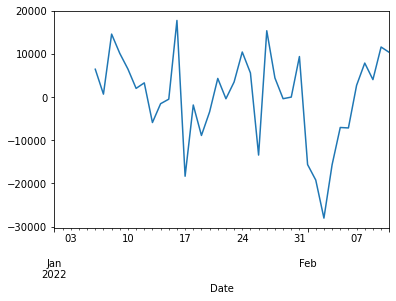

In [160]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
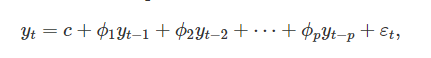

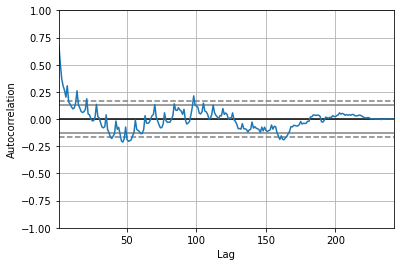

In [17]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Quantity'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

NameError: name 'sm' is not defined

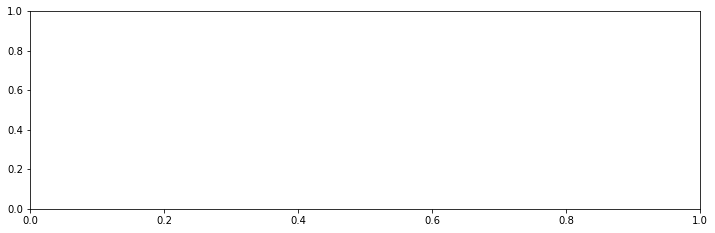

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=6,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=6,ax=ax2)

In [24]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [25]:
model=ARIMA(df['Quantity'],order=(1,1,1))
model_fit=model.fit()

G:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
G:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
G:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [26]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Quantity   No. Observations:                  242
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2009.376
Date:                Thu, 06 Oct 2022   AIC                           4024.752
Time:                        03:41:57   BIC                           4035.206
Sample:                    01-01-2022   HQIC                          4028.964
                         - 08-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5688      0.069      8.276      0.000       0.434       0.703
ma.L1         -0.9190      0.044    -20.934      0.000      -1.005      -0.833
sigma2      1.017e+06   4.53e+04     22.471      0.000    9.28e+05    1.11e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):               607.55
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             1.39
Prob(H) (two-sided):                  0.07   Kurtosis:                        10.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

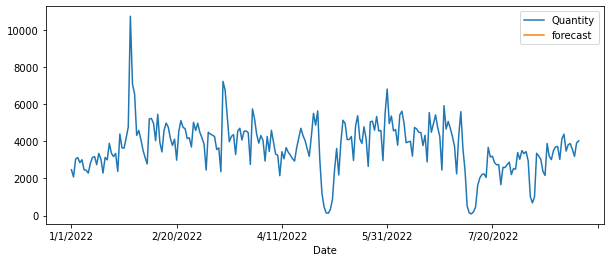

In [30]:

df['forecast']=model_fit.predict(start=100,end=200,dynamic=True)
df[['Quantity','forecast']].plot(figsize=(10,4))

In [31]:
import statsmodels.api as sm

In [32]:
model=sm.tsa.statespace.SARIMAX(df['Quantity'],order=(1, 1, 1),seasonal_order=(1,1,1,5))
results=model.fit()

G:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
G:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
G:\New folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Date'>

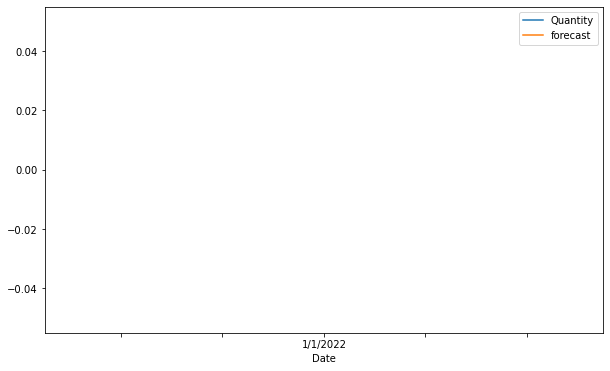

In [34]:
df['Quantity']=results.predict(start=100,end=200,dynamic=True)
df[['Quantity','forecast']].plot(figsize=(10,6))

In [35]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

TypeError: can only concatenate str (not "DateOffset") to str

In [207]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [208]:
future_datest_df.tail()

,Sales,Sales First Difference,forecast,Seasonal First Difference
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [209]:
future_df=pd.concat([df,future_datest_df])

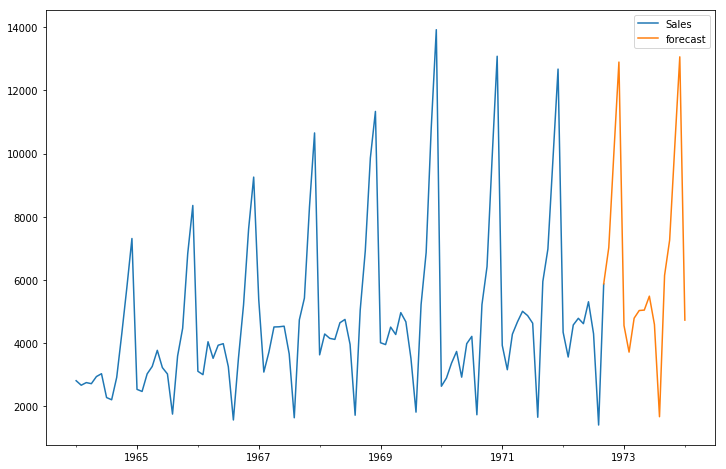

In [201]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 